In [31]:
# Core modules
import asyncio

# Non-core modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Local modules
from pac_hunter.hunter import fetch_committee_distributions, clean_df
from pac_hunter.states import us_state_to_abbrev, abbrev_to_us_state
try:
    from pac_hunter.constants import OPENFEC_API_KEY
except ImportError:
    OPENFEC_API_KEY = "DEMO_KEY"


In [41]:
jan6_house = pd.read_csv("jan6-house-deniers.csv")
jan6_senate = pd.read_csv("jan6-senate-deniers.csv")
jan6_congress = pd.concat([jan6_house.assign(office="Representative"), jan6_senate.assign(office="Senator")], ignore_index=True)
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/election-deniers/fivethirtyeight_election_deniers.csv"
ballot_deniers = pd.read_csv(url)
ballot_deniers = ballot_deniers.assign(party="r")
ballot_deniers = ballot_deniers.query("Stance != 'Fully accepted'")
ballot_deniers = ballot_deniers.query("Stance != 'No comment'")

In [42]:
jan6_congress_clean = clean_df(jan6_congress)
ballot_deniers_clean = clean_df(ballot_deniers)
jan6_deniers = jan6_congress_clean.query("vote=='yea'")

In [43]:
denier_donations = await fetch_committee_distributions(
    api_key=OPENFEC_API_KEY,
    committee_name="raytheon technologies",
    recipient_names=ballot_deniers_clean["name"].to_list(),
)

Multiple results for committee raytheon technologies, taking the first entry


In [44]:
denier_donations

,memo_total,committee_id,recipient_id,cycle,count,recipient_name,committee_name,total,memo_count,id,office_sought,name,candidate_id,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID
0,0.0,C00097568,C00313247,2022,5,ROBERT ADERHOLT FOR CONGRESS,EMPLOYEES OF RAYTHEON TECHNOLOGIES CORPORATION...,7000.0,0,H6AL04098,H,"ADERHOLT, ROBERT B. REP.",H6AL04098,2022,2022,H,P,234772
1,0.0,C00097568,C00313247,2020,4,ROBERT ADERHOLT FOR CONGRESS,EMPLOYEES OF RAYTHEON TECHNOLOGIES CORPORATION...,10000.0,0,H6AL04098,H,"ADERHOLT, ROBERT B. REP.",H6AL04098,2022,2022,H,P,234772
2,0.0,C00097568,C00313247,2010,8,ROBERT ADERHOLT FOR CONGRESS,EMPLOYEES OF RAYTHEON TECHNOLOGIES CORPORATION...,10000.0,0,H6AL04098,H,"ADERHOLT, ROBERT B. REP.",H6AL04098,2022,2022,H,P,234772
3,0.0,C00097568,C00313247,2008,8,ROBERT ADERHOLT FOR CONGRESS,EMPLOYEES OF RAYTHEON TECHNOLOGIES CORPORATION...,10000.0,0,H6AL04098,H,"ADERHOLT, ROBERT B. REP.",H6AL04098,2022,2022,H,P,234772
4,0.0,C00097568,C00313247,2006,4,ROBERT ADERHOLT FOR CONGRESS,EMPLOYEES OF RAYTHEON TECHNOLOGIES CORPORATION...,4000.0,0,H6AL04098,H,"ADERHOLT, ROBERT B. REP.",H6AL04098,2022,2022,H,P,234772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.0,C00097568,C00502229,2018,1,WEBER FOR CONGRESS,EMPLOYEES OF RAYTHEON TECHNOLOGIES CORPORATION...,1000.0,0,H2TX14149,H,"WEBER, RANDY",H2TX14149,2022,2022,H,P,235214
399,0.0,C00097568,C00502229,2016,2,WEBER FOR CONGRESS,EMPLOYEES OF RAYTHEON TECHNOLOGIES CORPORATION...,4000.0,0,H2TX14149,H,"WEBER, RANDY",H2TX14149,2022,2022,H,P,235214
400,0.0,C00097568,C00502229,2014,4,WEBER FOR CONGRESS,EMPLOYEES OF RAYTHEON TECHNOLOGIES CORPORATION...,3500.0,0,H2TX14149,H,"WEBER, RANDY",H2TX14149,2022,2022,H,P,235214
401,0.0,C00097568,C00477240,2022,2,MORGAN GRIFFITH FOR CONGRESS,EMPLOYEES OF RAYTHEON TECHNOLOGIES CORPORATION...,2000.0,0,H0VA09055,H,"GRIFFITH, H MORGAN",H0VA09055,2022,2022,H,P,235150


In [52]:
denier_donations_by_cycle = denier_donations.groupby(["name", "office_sought", "cycle"]).sum("total").reset_index()

In [53]:
denier_donations_by_cycle

,name,office_sought,cycle,memo_total,count,total,memo_count
0,"ADERHOLT, ROBERT B. REP.",H,1998,0.0,3,3000.0,0
1,"ADERHOLT, ROBERT B. REP.",H,2000,0.0,6,5000.0,0
2,"ADERHOLT, ROBERT B. REP.",H,2002,0.0,2,2000.0,0
3,"ADERHOLT, ROBERT B. REP.",H,2004,0.0,3,3000.0,0
4,"ADERHOLT, ROBERT B. REP.",H,2006,0.0,4,4000.0,0
...,...,...,...,...,...,...,...
295,"WITTMAN, ROBERT J MR.",H,2018,0.0,10,20000.0,0
296,"WITTMAN, ROBERT J MR.",H,2020,0.0,10,20000.0,0
297,"ZELDIN, LEE MICHAEL",H,2016,0.0,6,8500.0,0
298,"ZELDIN, LEE MICHAEL",H,2018,0.0,8,10000.0,0


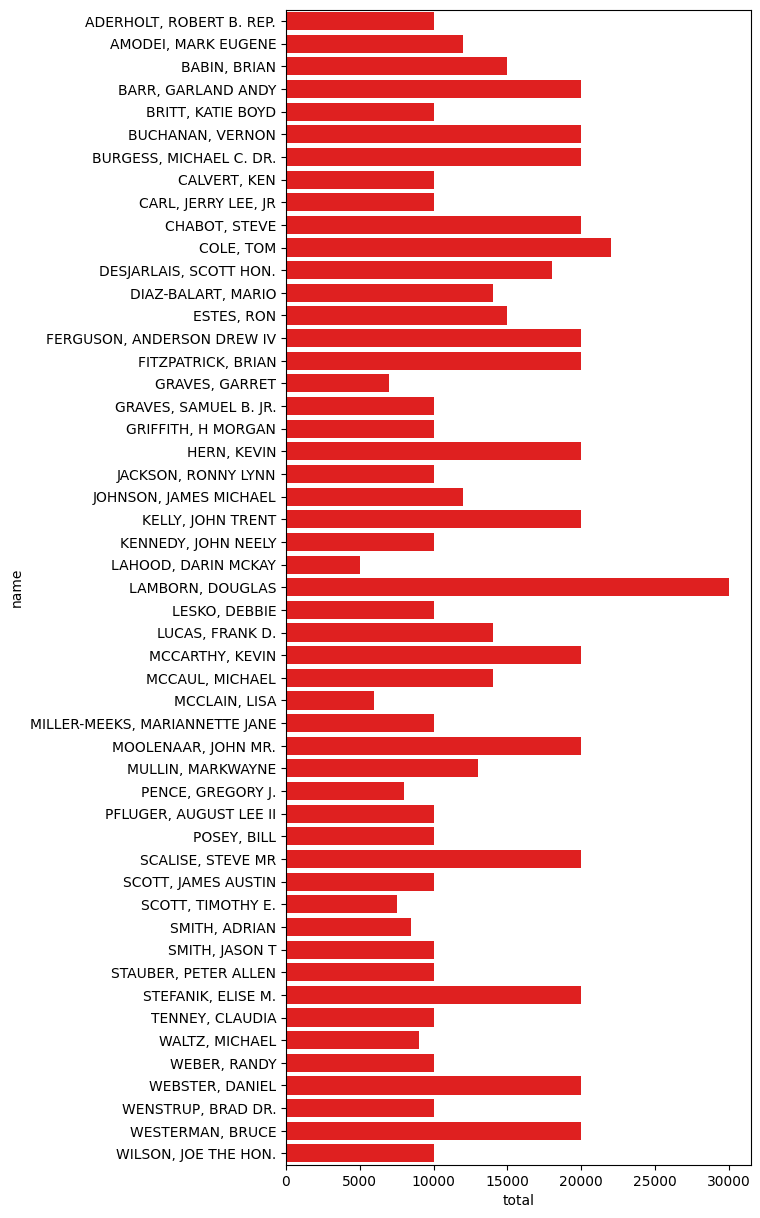

In [72]:
f, ax = plt.subplots(figsize=(6, 15))
cycles = sorted(denier_donations_by_cycle["cycle"].unique())
sns.set_color_codes("muted")
for cycle in cycles:
    sns.barplot(x="total", y="name", color = 'red', data=denier_donations_by_cycle.query(f"cycle == {cycle}").sort_values(by=["name"]))